In [35]:
%matplotlib inline
import numpy as np
import pandas as pd 
import psycopg2
import time
import math
from datetime import date, timedelta

import matplotlib.pyplot as plt
import seaborn as sns
from colour import Color

import warnings
warnings.filterwarnings("ignore")

In [9]:
with open ('/Users/patriciosanchez/Documents/Python/Connections/dwh.txt', 'r') as file:
    lines=file.readlines()
    dwh_host=lines[0].strip('\n')
    dwh_user=lines[1].strip('\n')
    dwh_port=lines[2].strip('\n')
    dwh_database=lines[3].strip('\n')
    dwh_password=lines[4].strip('\n')
    file.close()
    

con = psycopg2.connect(dbname= dwh_database,
                    host=dwh_host,
                    port= dwh_port,
                    user= dwh_user,
                    password= dwh_password)
    

# Define timeframe
start_date = date(2021, 6, 15)
end_date = date(2021, 7, 20)
delta = timedelta(days=1)
data = pd.DataFrame()

# Loop all days
while start_date < end_date:
    print (start_date.strftime("%Y-%m-%d"))
    next_date = start_date+delta
    
    qry = '''select (date_trunc('week', rfs.creation_time)) as week,
       nullif(json_extract_path_text(features, 'ml', 'ml_uch', 'score'),' ')::int as score,
       json_extract_path_text(features, 'order', 'countryCode') as country_code,
       json_extract_path_text(features, 'customer', 'finishedOrdersCount') as foc
        from risk_feature_snapshots rfs
        join checkout_order co
            on json_extract_path_text(features, 'order', 'checkoutId') = cast(co.checkout_id as text)
        where 1=1 
        and score is not null
        and rfs.checkpoint = 'checkout'
        and json_extract_path_text(features, 'order', 'countryCode') not in ('CR', 'EC', 'PE', 'HN', 'GT')
        and rfs.creation_time >= \'''' + start_date.strftime("%Y-%m-%d") + '''\'
        and rfs.creation_time < \'''' + next_date.strftime("%Y-%m-%d") + '''\'
        ''' 

    df = pd.read_sql_query(qry, con)
    data = data.append(df)
    start_date = next_date
    
con.close()

2021-06-15
2021-06-16
2021-06-17
2021-06-18
2021-06-19
2021-06-20
2021-06-21
2021-06-22
2021-06-23
2021-06-24
2021-06-25
2021-06-26
2021-06-27
2021-06-28
2021-06-29
2021-06-30
2021-07-01
2021-07-02
2021-07-03
2021-07-04
2021-07-05
2021-07-06
2021-07-07
2021-07-08
2021-07-09
2021-07-10
2021-07-11
2021-07-12
2021-07-13
2021-07-14
2021-07-15
2021-07-16
2021-07-17
2021-07-18
2021-07-19


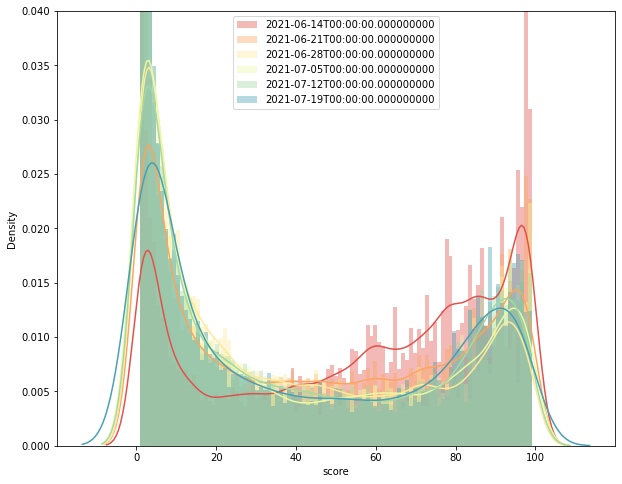

In [59]:
plt.figure(figsize=(10,8))

sns.set_palette("Spectral")

for w in data['week'].unique():
    c = 0
    sns.distplot(data[(data['week']==w) & (data['score']>0)]['score'], bins=99, kde=True, label=w)
    c+=1
plt.legend()
plt.ylim(0,0.04)
plt.show()

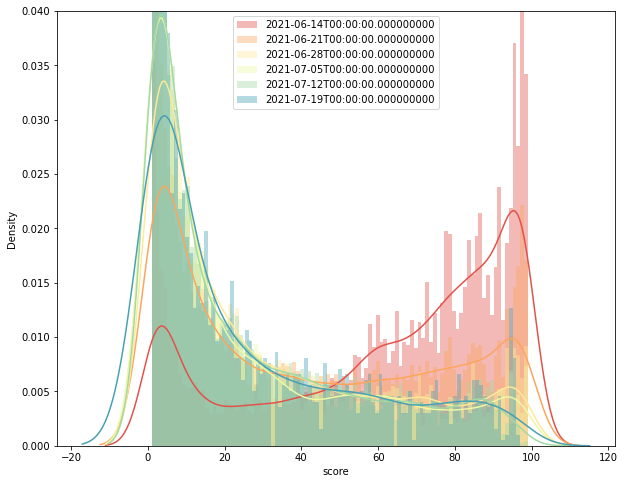

In [61]:
plt.figure(figsize=(10,8))

sns.set_palette("Spectral")

for w in data['week'].unique():
    c = 0
    sns.distplot(data[(data['week']==w) & (data['score']>0) & (data['country_code']=='ES')]['score'], bins=99, kde=True, label=w)
    c+=1
plt.legend()
plt.ylim(0,0.04)
plt.show()

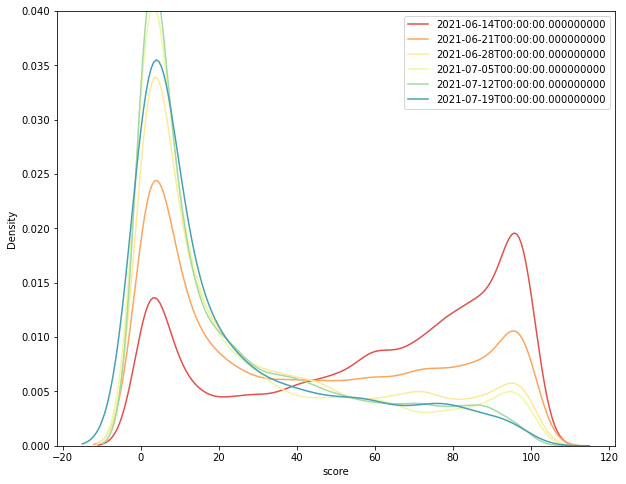

In [66]:
plt.figure(figsize=(10,8))

sns.set_palette("Spectral")

for w in data['week'].unique():
    c = 0
    sns.kdeplot(data = data[(data['week']==w) & (data['score']>0) & (data['country_code']=='IT')], x='score', label=w)
    c+=1
plt.legend()
plt.ylim(0,0.04)
plt.show()